# EDA BOOSTING

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df.shape

(768, 9)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


La base de datos tiene 768 filas y 9 columnas. Todas las columnas son numericas

DUPLICADOS

In [52]:

duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

print("No existen datos duplicados")

0
No existen datos duplicados


In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
#ELIMINACION DE COLUMNAS IRRELEVANTES

df.drop(["SkinThickness"], axis=1, inplace=True)

df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [57]:
#INFORMACION DE CADA VARIABLE 

print("Glucose\n", df.Glucose.value_counts(), "\n")
print("BloodPressure\n", df.BloodPressure.value_counts(), "\n")
print("Insulin\n", df.Insulin.value_counts(), "\n")
print("BMI\n", df.BMI.value_counts(), "\n")
print("DiabetesPedigreeFunction\n", df.DiabetesPedigreeFunction.value_counts(), "\n")
print("Outcome\n", df.Outcome.value_counts(), "\n")

Glucose
 Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64 

BloodPressure
 BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64 

Insulin
 Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
178      1
127      1
510      1
16       1
112      1
Name: count, Length: 186, dtype: int64 

BMI
 BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3   

#ANALISIS UNIVARIABLE

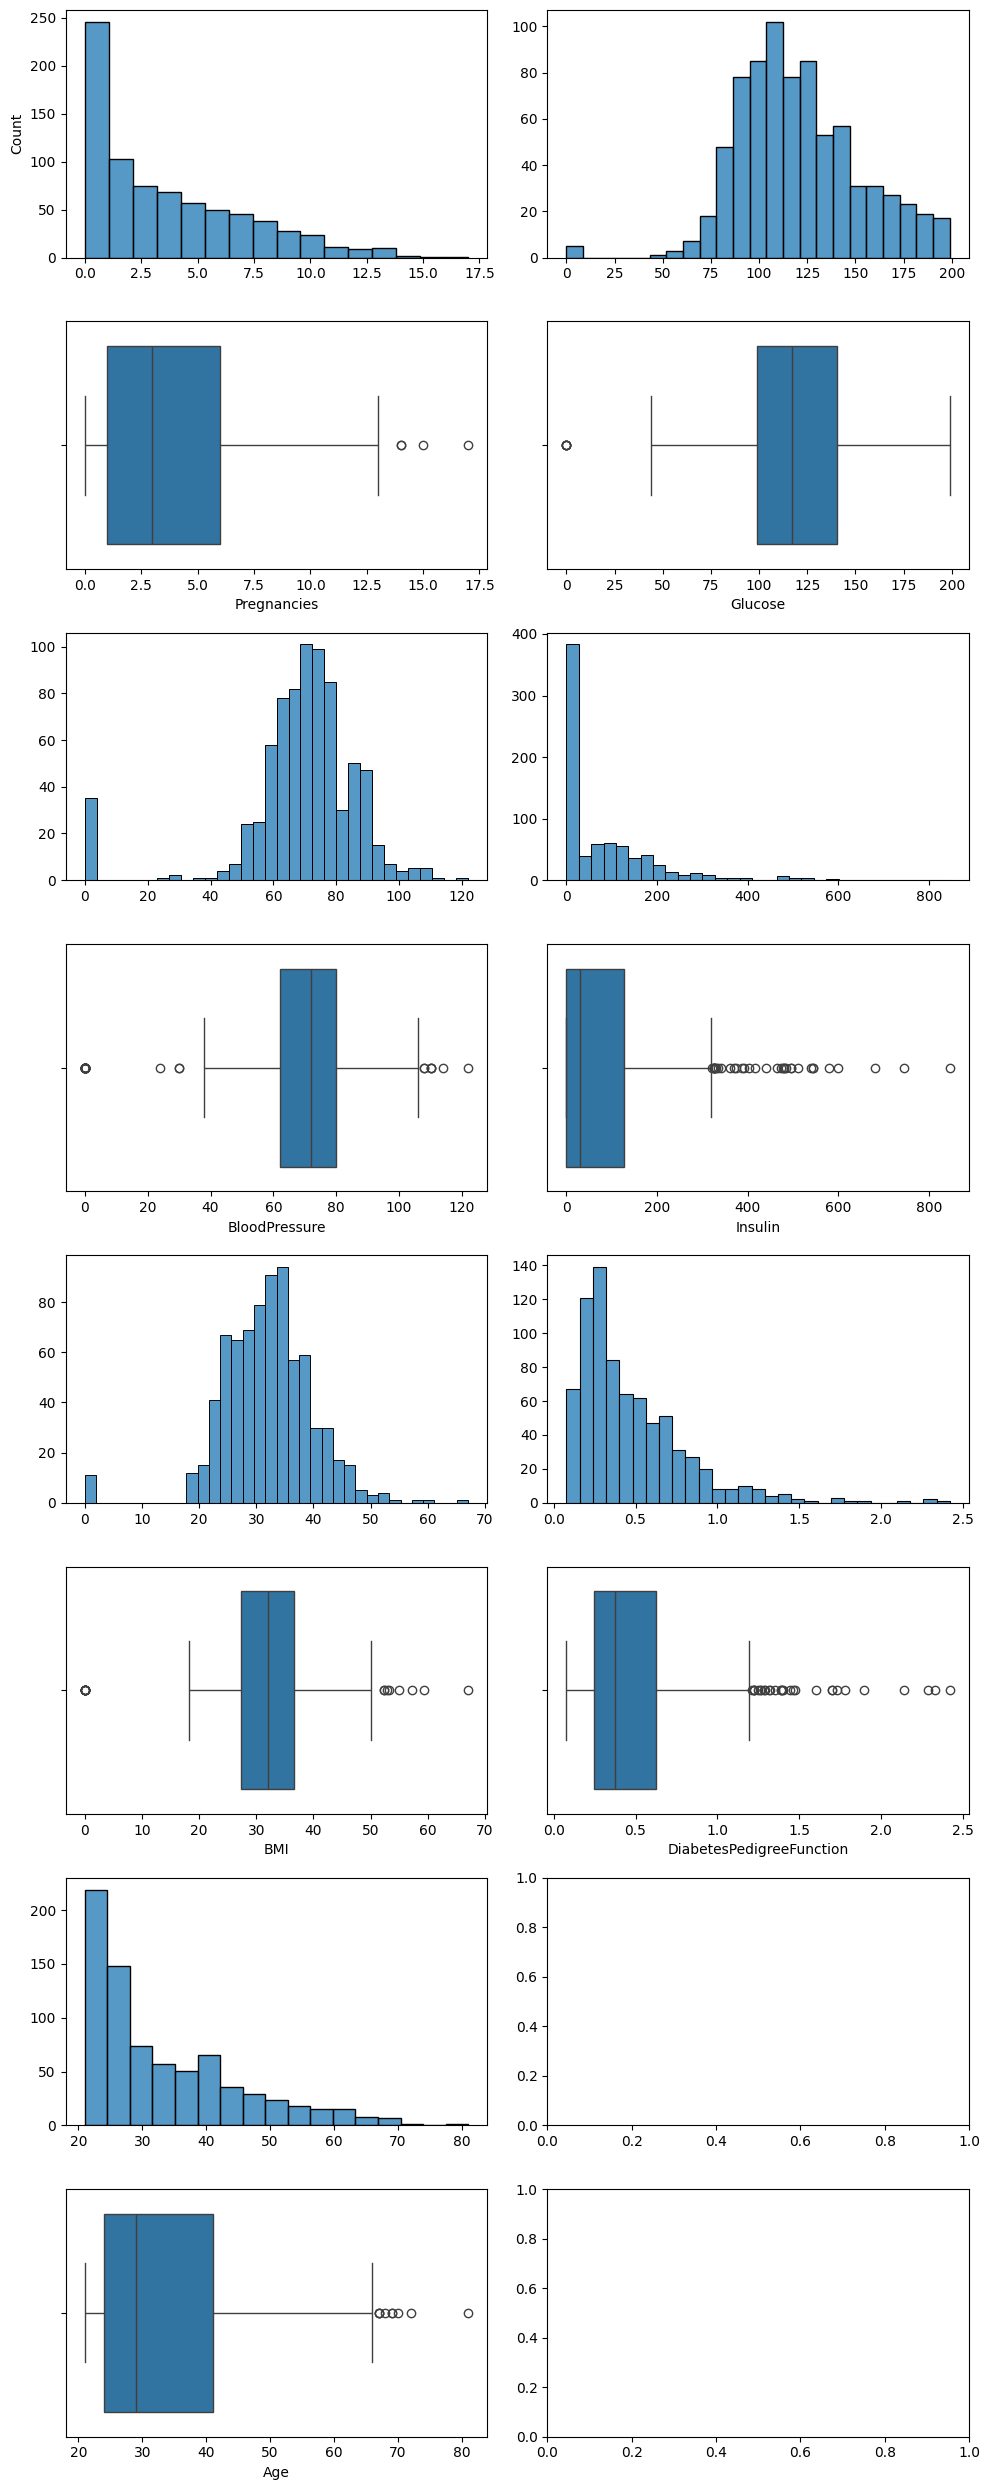

In [10]:
fig, axes = plt.subplots(8, 2, figsize=(10, 25), gridspec_kw={'height_ratios': [1]*8})

sns.histplot(ax=axes[0, 0], data=df, x= "Pregnancies").set(xlabel=None)
sns.boxplot(ax=axes[1, 0], data=df, x= "Pregnancies")

sns.histplot(ax=axes[0, 1], data=df, x="Glucose").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[1, 1], data=df, x="Glucose")

sns.histplot(ax=axes[2, 0], data=df, x="BloodPressure").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 0], data=df, x="BloodPressure")

sns.histplot(ax=axes[2, 1], data=df, x="Insulin").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[3, 1], data=df, x="Insulin")

sns.histplot(ax=axes[4, 0], data=df, x="BMI").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[5, 0], data=df, x="BMI")

sns.histplot(ax=axes[4, 1], data=df, x="DiabetesPedigreeFunction").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[5, 1], data=df, x="DiabetesPedigreeFunction")

sns.histplot(ax=axes[6, 0], data=df, x="Age").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axes[7, 0], data=df, x="Age")


plt.tight_layout()
plt.show()


Todas la variables tienen outliers; por lo que se procede a eliminarlos.

ELIMINACION DE OUTLIERS

In [12]:
# Glucose - Filtrar valores de Glucosa (67 a 200)
glu_so = (df['Glucose'] >= 67) & (df['Glucose'] <= 200)

#BlodPressure
# Filtrar valores de BlodPresure (55 a 120)
bp_so = (df['BloodPressure'] >= 55) & (df['BloodPressure'] <= 120)

#Insulin
# Filtrar valores de Insulin (5 a 200)
i_so = (df['Insulin'] >= 5) & (df['Insulin'] <= 200)

#BMI
# Filtrar valores de BMI (18 a 45)
bmi_so = (df['BMI'] >= 18) & (df['BMI'] <= 45)

# Aplicar ambos filtros al dataframe
df_filtrado = df[glu_so & bp_so & i_so & bmi_so]

df_filtrado.shape

(262, 9)

Se establecen los limites de bmi y Charges para eliminar los outliers de acuerdo a la observacion de la tabla de estadistica descriptiva
Se crea un dataframe adicional con las variables sin outliers.
Finalmente no se considera usar el df con limites de los outliers porque afecta al resultado del modelo de regresion elegid.

In [106]:
#Base de datos sin Outliers de variables criticas
df_filtrado.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,94,28.1,0.167,21,0
14,5,166,72,175,25.8,0.587,51,1
19,1,115,70,96,34.6,0.529,32,1
24,11,143,94,146,36.6,0.254,51,1
25,10,125,70,115,31.1,0.205,41,1


Mapa de calor 

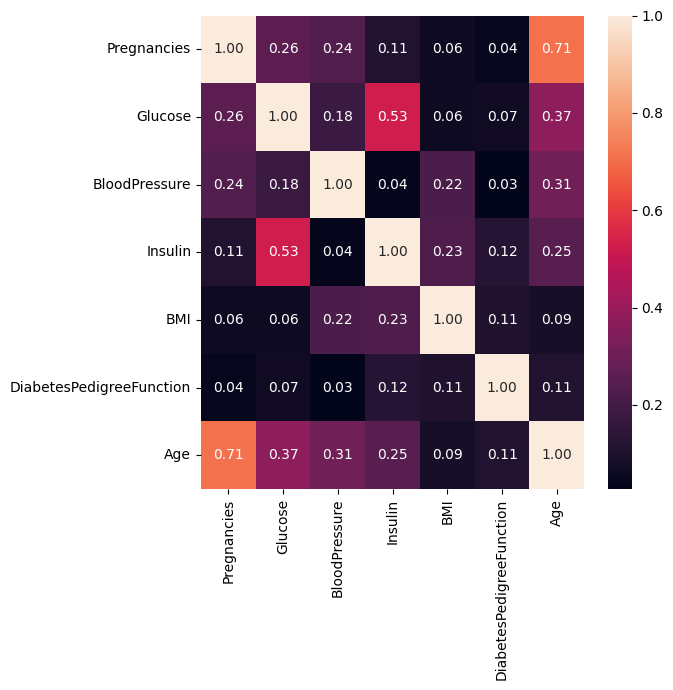

In [42]:
fig, axes = plt.subplots(figsize = (7, 7))

sns.heatmap(df_filtrado[["Pregnancies",	"Glucose", "BloodPressure",	"Insulin",	"BMI", "DiabetesPedigreeFunction",	"Age"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El mapa de calor muestra una correlacion entre glucosa e insulina, asi como embarazo y edad. No se observa mas correlacion en el resto de variables

SPLIT, MODELADO, ENTRENAMIENTO DE DATOS, PREDICCION Y METRICAS

In [16]:
#SE DIVIDEN LOS DATOS

X = df_filtrado.drop("Outcome", axis = 1)
y = df_filtrado["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
532,1,86,66,52,65,41.3,0.917,29
353,1,90,62,12,43,27.2,0.580,24
306,10,161,68,23,132,25.5,0.326,47
692,2,121,70,32,95,39.1,0.886,23
203,2,99,70,16,44,20.4,0.235,27


In [17]:
y.unique()

array([0, 1])

In [ ]:
# MODELADO y ENTRENAMIENTO

# modelos
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, random_state = 42, use_label_encoder=False, eval_metric='mlogloss', max_depth=4)
lgb = LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state = 42, max_depth=4)

# entrenamiento
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 65, number of negative: 144
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.311005 -> initscore=-0.795426
[LightGBM] [Info] Start training from score -0.795426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,4
,learning_rate,0.05
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [37]:
# Predicción
ada_y_pred_test = ada.predict(X_test)
gb_y_pred_test = gb.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
lgb_y_pred_test = lgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
gb_y_pred_train = gb.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)
lgb_y_pred_train = lgb.predict(X_train)

In [38]:
# Metricas
ada_accuracy_test = accuracy_score(y_test, ada_y_pred_test)
ada_accuracy_train = accuracy_score(y_train, ada_y_pred_train)

gb_accuracy_test = accuracy_score(y_test, gb_y_pred_test)
gb_accuracy_train = accuracy_score(y_train, gb_y_pred_train)

xgb_accuracy_test = accuracy_score(y_test, xgb_y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, xgb_y_pred_train)

lgb_accuracy_test = accuracy_score(y_test, lgb_y_pred_test)
lgb_accuracy_train = accuracy_score(y_train, lgb_y_pred_train)

print('AdaBoost')
print("Accuracy Test: ", ada_accuracy_test)
print("Accuracy Train: ", ada_accuracy_train)

print('Gradient Boosting')
print("Accuracy Test: ", gb_accuracy_test)
print("Accuracy Train: ", gb_accuracy_train)

print('XGBoost')
print("Accuracy Test: ", xgb_accuracy_test)
print("Accuracy Train: ", xgb_accuracy_train)

print('LightGBM')
print("Accuracy Test: ", lgb_accuracy_test)
print("Accuracy Train: ", lgb_accuracy_train)


AdaBoost
Accuracy Test:  0.7924528301886793
Accuracy Train:  0.8325358851674641
Gradient Boosting
Accuracy Test:  0.8490566037735849
Accuracy Train:  0.9617224880382775
XGBoost
Accuracy Test:  0.8679245283018868
Accuracy Train:  1.0
LightGBM
Accuracy Test:  0.8867924528301887
Accuracy Train:  0.9856459330143541


## CONCLUSION

- El modelo de Random Forest en el proyecto anterior, indico un coeficiente de 83%
- Se ha modificado algunos hiperparametros para evitar el sobreajuste. Estos son la profundiad del XGBoost y LightGBM a nivel 4 y los estimadores a 200, el learning rate en todos se puso 0.05
_ Adaboost tiene un Accuracy test de 79%, puede estar subentrenado y no es confiable 
- Gradient Boosting tiene un Accuracy test de 84% y un train de 96% esta casi sobreentrenado 
- XGBOOST 86% de test pero tiene un sobreentreniento en el train
_ LightGBM 88% en el test y 98% en el train. Es el mejor modelo porque tiene el Test o evaluacion mas alto
- A continuacion se grafica las variables con mayor importancia consideradas dentro del modelo de lightGBM, siendo la glucosa, BMI y antecedentes geneticos las viriables con mayor importancia


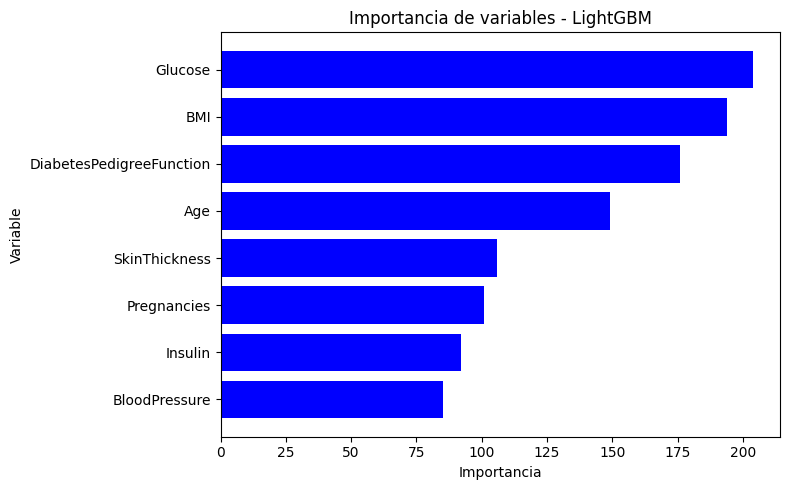

In [ ]:

#GRAFICO DE LAS VARIABLES CON MAYOR IMPORTANCIA SEGUN MODELO ELEGIDO LIGHTGBM

graficolgb = pd.DataFrame({"Variable": X_train.columns,"Importancia": lgb.feature_importances_}).sort_values(by="Importancia", ascending=False)

# Gráfico
plt.figure(figsize=(8,5))
plt.barh(graficolgb["Variable"], graficolgb["Importancia"], color="blue")
plt.title("Importancia de variables segun modelo LightGBM")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()